In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

%matplotlib inline

In [2]:
zip_df = pd.read_pickle('../data/wip/zip_df.pkl')
zip_df

1001      1002      1005      1007      1008      1010  \
time                                                                     
1996-04-01  113100.0  161000.0  103100.0  133400.0  117500.0  115800.0   
1996-05-01  112800.0  160100.0  103400.0  132700.0  117300.0  115700.0   
1996-06-01  112600.0  159300.0  103600.0  132000.0  117100.0  115500.0   
1996-07-01  112300.0  158600.0  103800.0  131400.0  117000.0  115300.0   
1996-08-01  112100.0  158000.0  103900.0  130800.0  116800.0  115100.0   
...              ...       ...       ...       ...       ...       ...   
2017-12-01  221700.0  342000.0  213300.0  268100.0  205400.0  243800.0   
2018-01-01  221700.0  344500.0  215600.0  268100.0  204500.0  244600.0   
2018-02-01  221700.0  347400.0  217900.0  268800.0  206800.0  246700.0   
2018-03-01  222700.0  350600.0  219500.0  270000.0  210900.0  248800.0   
2018-04-01  223600.0  353300.0  220700.0  270600.0  214200.0  250900.0   

                1011      1013      1020      1026  ...     99654     99664  \
time                                                ...                       
1996-04-01   87000.0   88500.0   97200.0   91200.0  ...  122700.0  112200.0   
1996-05-01   87000.0   88500.0   97100.0   91100.0  ...  124200.0  112400.0   
1996-06-01   87100.0   88400.0   97000.0   91000.0  ...  125700.0  112600.0   
1996-07-01   87200.0   88300.0   96800.0   90800.0  ...  127200.0  112800.0   
1996-08-01   87400.0   88200.0   96600.0   90700.0  ...  128600.0  113000.0   
...              ...       ...       ...       ...  ...       ...       ...   
2017-12-01  151400.0  173300.0  187400.0  201200.0  ...  258800.0  219100.0   
2018-01-01  150100.0  174600.0  188100.0  204600.0  ...  259400.0  218900.0   
2018-02-01  150100.0  175900.0  189000.0  211200.0  ...  259900.0  218300.0   
2018-03-01  149500.0  176900.0  189600.0  217900.0  ...  260200.0  218400.0   
2018-04-01  149100.0  177400.0  189800.0  220800.0  ...  260500.0  219100.0   

               99669     99701     99705     99709     99712     99801  \
time                                                                     
1996-04-01  112500.0   89400.0  101900.0  103000.0  109200.0  166800.0   
1996-05-01  113100.0   89800.0  102900.0  103900.0  109600.0  166200.0   
1996-06-01  113800.0   90200.0  103800.0  104700.0  110000.0  165400.0   
1996-07-01  114400.0   90600.0  104700.0  105500.0  110400.0  164400.0   
1996-08-01  115100.0   91000.0  105400.0  106200.0  110800.0  163500.0   
...              ...       ...       ...       ...       ...       ...   
2017-12-01  250200.0  206700.0  261100.0  262800.0  273500.0  402300.0   
2018-01-01  250600.0  206100.0  261300.0  262800.0  273800.0  406200.0   
2018-02-01  250100.0  205600.0  261400.0  262300.0  273800.0  409800.0   
2018-03-01  249300.0  205500.0  261700.0  262000.0  273900.0  412600.0   
2018-04-01  249300.0  205700.0  262000.0  262400.0  274600.0  413300.0   

               99835     99901  
time                            
1996-04-01  155500.0  117100.0  
1996-05-01  154900.0  117200.0  
1996-06-01  154200.0  117300.0  
1996-07-01  153500.0  117400.0  
1996-08-01  152800.0  117500.0  
...              ...       ...  
2017-12-01  396200.0  291900.0  
2018-01-01  397500.0  294200.0  
2018-02-01  398900.0  297500.0  
2018-03-01  402100.0  302100.0  
2018-04-01  404800.0  305100.0  

[265 rows x 14723 columns]

In [3]:
# How many rows have x number of missing values (number of rows is the value column of output, number of missing is index)
missing_count = zip_df.isna().sum().value_counts().sort_index()
missing_count

0      13684
15         1
21         2
87       118
93        31
99        21
105       52
107       13
111       78
117       56
123       27
129       20
135        7
141        6
147        9
153       11
159        7
165        1
167      230
171       41
177       33
183       24
189       27
195       18
201       55
207       42
213       53
219       56
dtype: int64

In [4]:
# How many rows are missing values? (sum of counts in missing_count minus the number of entries with zero missing: 13684)
missing_count.sum() - 13684

1039

In [5]:
# About Seven Percent of zipcodes are missing 15 or more entries
1039/len(zip_df.columns)

0.07056985668681655

In [6]:
zip_df.index.max()

Timestamp('2018-04-01 00:00:00')

In [7]:
# Are there any missing values recently-- last six months-- (no), if so discard those
zip_df.iloc[zip_df.index > '2017-10-01'].isna().sum().value_counts()

0    14723
dtype: int64

## Project Plan
1) Shape data by zipcode(columns), indexed by date

    - Plan to deal with missing values, how many months missing is okay? Imputation potentially?

2) Test models on 1 zipcode, outputting best model (accuracy measure?) and best differencing params

    - Difference/decompose each column before fitting models, use adfuller as stationarity test
    - Use a 75-25 Train/Test Split

3) Create decision function based off ROI adjusted for loss scenarios/conf int.

4) Test models on 10 zipcodes, outputting best model (accuracy measure?), best differencing params for each zipcode, as well as largest predicted ROI

5) Test models on all zipcodes as in step 4

6) Modular add-ons (rent offset, performance over time, etc.)

In [8]:
# Convert columns to string for easier index access, move this step higher up the workflow
zip_df.columns = [str(x) for x in zip_df.columns]
zip_df.columns

Index(['1001', '1002', '1005', '1007', '1008', '1010', '1011', '1013', '1020',
       '1026',
       ...
       '99654', '99664', '99669', '99701', '99705', '99709', '99712', '99801',
       '99835', '99901'],
      dtype='object', length=14723)

In [9]:
# Notes from checkin:

# Results by client class, who can take advantage of x? Do you need minimum amount of capital etc.?



In [10]:
zip_df['1001']

time
1996-04-01    113100.0
1996-05-01    112800.0
1996-06-01    112600.0
1996-07-01    112300.0
1996-08-01    112100.0
                ...   
2017-12-01    221700.0
2018-01-01    221700.0
2018-02-01    221700.0
2018-03-01    222700.0
2018-04-01    223600.0
Name: 1001, Length: 265, dtype: float64

In [11]:

adfuller(zip_df['1001'])

(-1.7467926412738275,
 0.40717889973199395,
 13,
 251,
 {'1%': -3.4566744514553016,
  '5%': -2.8731248767783426,
  '10%': -2.5729436702592023},
 3563.9412458378274)

<Figure size 432x288 with 0 Axes>

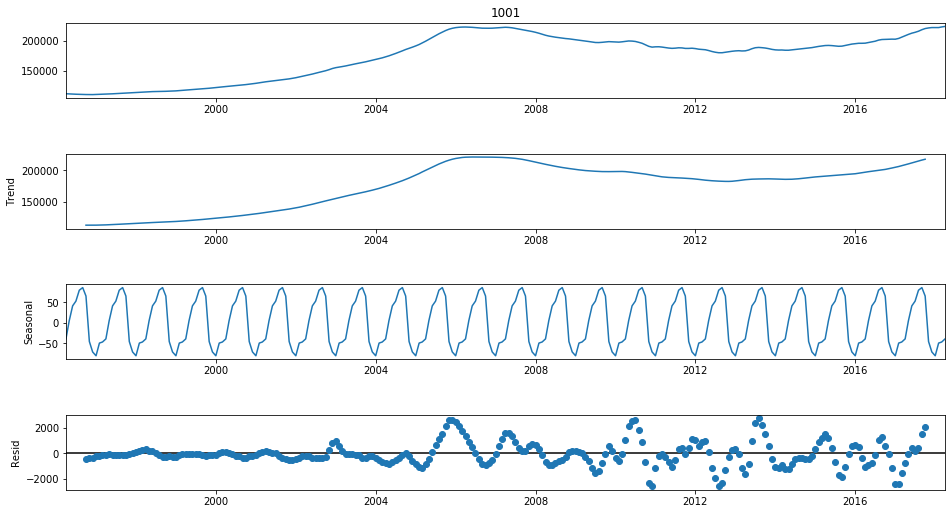

In [12]:
decomposition = seasonal_decompose(zip_df['1001'])
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

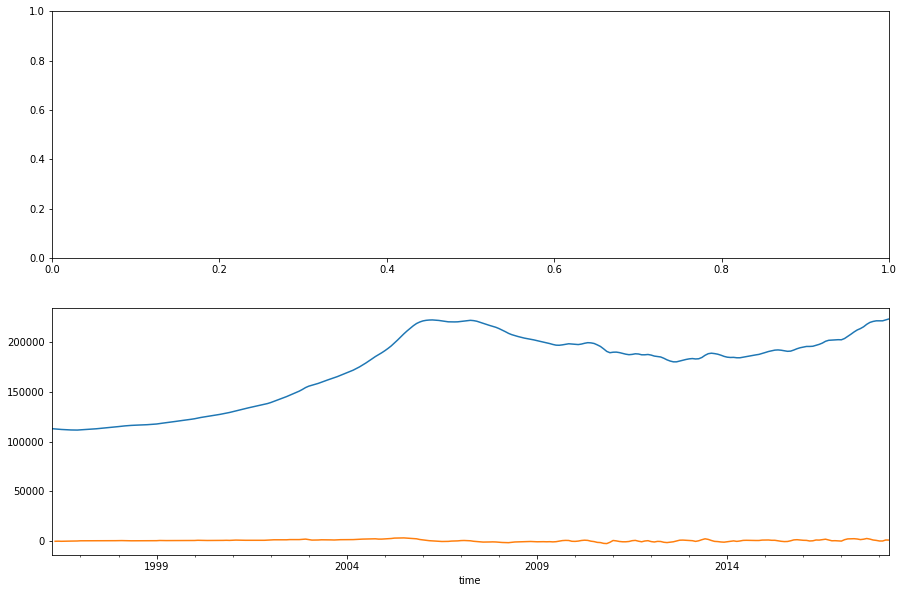

In [13]:
one_train = zip_df['1001']

fig, axs = plt.subplots(2, figsize=(15,10))
axs[0] = one_train.plot()
axs[1] = one_train.diff().plot()
plt.show()

In [14]:
# Stationarity test with no lag
adfuller(one_train)

(-1.7467926412738275,
 0.40717889973199395,
 13,
 251,
 {'1%': -3.4566744514553016,
  '5%': -2.8731248767783426,
  '10%': -2.5729436702592023},
 3563.9412458378274)

In [15]:
# Stationarity with 1 lag
adfuller(one_train.diff()[1:])

(-1.9453525470037503,
 0.3110356104138362,
 12,
 251,
 {'1%': -3.4566744514553016,
  '5%': -2.8731248767783426,
  '10%': -2.5729436702592023},
 3552.048382789642)

In [16]:
# Stationarity with 2 lags
adfuller(one_train.diff()[1:].diff()[1:])

(-6.627156477050341,
 5.8372030590914575e-09,
 11,
 251,
 {'1%': -3.4566744514553016,
  '5%': -2.8731248767783426,
  '10%': -2.5729436702592023},
 3540.671779819917)

In [17]:
one_train.diff()[1:].diff()[1:]

time
1996-06-01     100.0
1996-07-01    -100.0
1996-08-01     100.0
1996-09-01       0.0
1996-10-01     100.0
               ...  
2017-12-01    -400.0
2018-01-01    -600.0
2018-02-01       0.0
2018-03-01    1000.0
2018-04-01    -100.0
Name: 1001, Length: 263, dtype: float64

In [18]:
train_ind = one_train.index[0:round(len(one_train)*.75)]
test_ind = [i for i in one_train.index if not i in train_ind]
test_ind
one_test = one_train[test_ind]
one_test

time
2012-11-01    182100.0
2012-12-01    182800.0
2013-01-01    183400.0
2013-02-01    183700.0
2013-03-01    183300.0
                ...   
2017-12-01    221700.0
2018-01-01    221700.0
2018-02-01    221700.0
2018-03-01    222700.0
2018-04-01    223600.0
Name: 1001, Length: 66, dtype: float64

In [19]:
one_train = one_train[train_ind]
one_train

time
1996-04-01    113100.0
1996-05-01    112800.0
1996-06-01    112600.0
1996-07-01    112300.0
1996-08-01    112100.0
                ...   
2012-06-01    182400.0
2012-07-01    181200.0
2012-08-01    180400.0
2012-09-01    180400.0
2012-10-01    181200.0
Name: 1001, Length: 199, dtype: float64

In [20]:
one_train.diff()[1:].diff()[1:]

time
1996-06-01    100.0
1996-07-01   -100.0
1996-08-01    100.0
1996-09-01      0.0
1996-10-01    100.0
              ...  
2012-06-01   -300.0
2012-07-01    400.0
2012-08-01    400.0
2012-09-01    800.0
2012-10-01    800.0
Name: 1001, Length: 197, dtype: float64

In [21]:
one_train[one_train.index == '2018-04-01']

Series([], Name: 1001, dtype: float64)

In [22]:
zip_df

1001      1002      1005      1007      1008      1010  \
time                                                                     
1996-04-01  113100.0  161000.0  103100.0  133400.0  117500.0  115800.0   
1996-05-01  112800.0  160100.0  103400.0  132700.0  117300.0  115700.0   
1996-06-01  112600.0  159300.0  103600.0  132000.0  117100.0  115500.0   
1996-07-01  112300.0  158600.0  103800.0  131400.0  117000.0  115300.0   
1996-08-01  112100.0  158000.0  103900.0  130800.0  116800.0  115100.0   
...              ...       ...       ...       ...       ...       ...   
2017-12-01  221700.0  342000.0  213300.0  268100.0  205400.0  243800.0   
2018-01-01  221700.0  344500.0  215600.0  268100.0  204500.0  244600.0   
2018-02-01  221700.0  347400.0  217900.0  268800.0  206800.0  246700.0   
2018-03-01  222700.0  350600.0  219500.0  270000.0  210900.0  248800.0   
2018-04-01  223600.0  353300.0  220700.0  270600.0  214200.0  250900.0   

                1011      1013      1020      1026  ...     99654     99664  \
time                                                ...                       
1996-04-01   87000.0   88500.0   97200.0   91200.0  ...  122700.0  112200.0   
1996-05-01   87000.0   88500.0   97100.0   91100.0  ...  124200.0  112400.0   
1996-06-01   87100.0   88400.0   97000.0   91000.0  ...  125700.0  112600.0   
1996-07-01   87200.0   88300.0   96800.0   90800.0  ...  127200.0  112800.0   
1996-08-01   87400.0   88200.0   96600.0   90700.0  ...  128600.0  113000.0   
...              ...       ...       ...       ...  ...       ...       ...   
2017-12-01  151400.0  173300.0  187400.0  201200.0  ...  258800.0  219100.0   
2018-01-01  150100.0  174600.0  188100.0  204600.0  ...  259400.0  218900.0   
2018-02-01  150100.0  175900.0  189000.0  211200.0  ...  259900.0  218300.0   
2018-03-01  149500.0  176900.0  189600.0  217900.0  ...  260200.0  218400.0   
2018-04-01  149100.0  177400.0  189800.0  220800.0  ...  260500.0  219100.0   

               99669     99701     99705     99709     99712     99801  \
time                                                                     
1996-04-01  112500.0   89400.0  101900.0  103000.0  109200.0  166800.0   
1996-05-01  113100.0   89800.0  102900.0  103900.0  109600.0  166200.0   
1996-06-01  113800.0   90200.0  103800.0  104700.0  110000.0  165400.0   
1996-07-01  114400.0   90600.0  104700.0  105500.0  110400.0  164400.0   
1996-08-01  115100.0   91000.0  105400.0  106200.0  110800.0  163500.0   
...              ...       ...       ...       ...       ...       ...   
2017-12-01  250200.0  206700.0  261100.0  262800.0  273500.0  402300.0   
2018-01-01  250600.0  206100.0  261300.0  262800.0  273800.0  406200.0   
2018-02-01  250100.0  205600.0  261400.0  262300.0  273800.0  409800.0   
2018-03-01  249300.0  205500.0  261700.0  262000.0  273900.0  412600.0   
2018-04-01  249300.0  205700.0  262000.0  262400.0  274600.0  413300.0   

               99835     99901  
time                            
1996-04-01  155500.0  117100.0  
1996-05-01  154900.0  117200.0  
1996-06-01  154200.0  117300.0  
1996-07-01  153500.0  117400.0  
1996-08-01  152800.0  117500.0  
...              ...       ...  
2017-12-01  396200.0  291900.0  
2018-01-01  397500.0  294200.0  
2018-02-01  398900.0  297500.0  
2018-03-01  402100.0  302100.0  
2018-04-01  404800.0  305100.0  

[265 rows x 14723 columns]

In [23]:
# ROI from beginning to end of table

(zip_df['1001'][-1]/zip_df['1001'][0]) - 1

0.9770114942528736

In [24]:
df = pd.DataFrame({'A': zip_df['1001'].values})
df['diff1'] = df['A'].diff()
df['diff2'] = df['diff1'].diff()

def transform_diff2s(x_start, diff_start, pred_diff2s):
    """Transform second order differenced predictions to the values of the original formatted data
    
    Params:
        x_start (numeric) the first value in the original series x
        diff_start (numeric) the first non-null value in the 1st order difference, ie. x.diff().iloc[1]
        pred_diff2s (series-like object) the predicted second order differenced values from some model
        
    Returns:
        (series) undifferenced values in original format of x"""
    import numpy as np
    
    x = x_start

    x2 = diff_start
    
    x_diff2 = pred_diff2s
    x_diff = np.r_[x2, x_diff2].cumsum().astype(int)
    transformed_preds = np.r_[x, x_diff].cumsum().astype(int)
    
    return transformed_preds

# x, x_diff = df['A'].iloc[0], df['B'].iloc[1:]
# df['D'] = np.r_[x, x_diff].cumsum().astype(int)
# x2, x_diff2 = df['B'].iloc[1], df['C'].iloc[2:]
# x_diff_test = np.r_[x2, x_diff2].cumsum().astype(int)
# x_diff_test == x_diff
# df['E'] = np.r_[x, np.r_[x2, x_diff2].cumsum().astype(int)].astype(int)
# print(x.size, x_diff.size, x_diff2.size, x2.size, len(df['A']))
transform_diff2s(df['A'][0], df['diff1'][1], df['diff2'][2:])

array([113100, 112800, 112600, 112300, 112100, 111900, 111800, 111700,
       111700, 111900, 112100, 112300, 112500, 112800, 113000, 113300,
       113600, 113900, 114200, 114500, 114800, 115200, 115600, 115900,
       116200, 116400, 116600, 116700, 116800, 116900, 117100, 117300,
       117500, 117800, 118300, 118700, 119100, 119500, 120000, 120400,
       120900, 121300, 121700, 122100, 122600, 123100, 123800, 124400,
       124900, 125400, 125900, 126400, 127000, 127500, 128100, 128800,
       129400, 130200, 131100, 131900, 132700, 133400, 134100, 134800,
       135400, 136100, 136800, 137500, 138400, 139400, 140600, 141800,
       143000, 144200, 145400, 146800, 148200, 149500, 150900, 152600,
       154500, 155900, 156800, 157700, 158700, 159900, 161100, 162200,
       163300, 164300, 165500, 166800, 168100, 169300, 170600, 172000,
       173600, 175300, 177200, 179200, 181300, 183500, 185700, 187600,
       189500, 191600, 193900, 196400, 199300, 202300, 205500, 208600,
      

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


Lag: 14
Coefficients: [-4.76619252  0.60141155 -0.38384097  0.0622626  -0.00643859 -0.21530151
  0.26172035 -0.16637076  0.08781042 -0.31303174  0.26210386  0.03789678
 -0.29948158 -0.1878581   0.250815  ]
72
263
predicted=184694.000000, expected=184000.000000
Test RMSE: 45681.431
predicted=184378.000000, expected=182400.000000
Test RMSE: 45681.431
predicted=183827.000000, expected=181200.000000
Test RMSE: 45681.431
predicted=182352.000000, expected=180400.000000
Test RMSE: 45681.431
predicted=181068.000000, expected=180400.000000
Test RMSE: 45681.431
predicted=180890.000000, expected=181200.000000
Test RMSE: 45681.431
predicted=180796.000000, expected=182100.000000
Test RMSE: 45681.431
predicted=179758.000000, expected=182800.000000
Test RMSE: 45681.431
predicted=178851.000000, expected=183400.000000
Test RMSE: 45681.431
predicted=178553.000000, expected=183700.000000
Test RMSE: 45681.431
predicted=178000.000000, expected=183300.000000
Test RMSE: 45681.431
predicted=177190.000000, exp

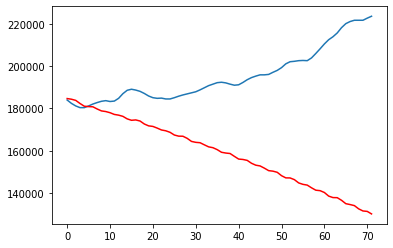

In [25]:


# split dataset using second order differenced data
diff_1 = zip_df['1001'].diff()[1:]
diff_2 = diff_1.diff()[1:]
test_undiff = zip_df['1001'][-72:].values
X = zip_df['1001'].diff()[1:].diff()[1:].values
train, test = X[0:len(X)-72], X[len(X)-72:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions on the differenced data
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
print(len(predictions))

print(X.size)
np.r_[train, predictions].size
#convert predictions back to values

predicted_values = transform_diff2s(zip_df['1001'][0], diff_1[0], np.r_[train, predictions])

model_predictions = predicted_values[-72:]
# print(X[-72], zip_df['1001'][[-74, -72]])
for i in range(len(model_predictions)):
    print('predicted=%f, expected=%f' % (model_predictions[i], test_undiff[i]))
    rmse = sqrt(mean_squared_error(test_undiff, model_predictions))
    print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test_undiff)
plt.plot(model_predictions, color='red')

plt.show()

In [26]:
# Let's Try a Naive Persistence Model as a baseline:

# Create lagged dataset
values = pd.DataFrame(zip_df['1001'].values)
df = pd.concat([values.shift(1), values], axis=1)
df.columns = ['t', 't+1']
df

t       t+1
0         NaN  113100.0
1    113100.0  112800.0
2    112800.0  112600.0
3    112600.0  112300.0
4    112300.0  112100.0
..        ...       ...
260  221100.0  221700.0
261  221700.0  221700.0
262  221700.0  221700.0
263  221700.0  222700.0
264  222700.0  223600.0

[265 rows x 2 columns]

In [27]:
# split into train and test sets

X = df.values
train_size = int(len(X) * 0.75)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]



In [28]:
# persistence model

predictions = [x for x in test_X]


# load data
series = zip_df['1001']
# create lagged dataset
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.75)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# skill of persistence model
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = pd.DataFrame(residuals)
residuals.describe()

Test RMSE: 1047.100


0
count    67.000000
mean    644.776119
std     831.261105
min   -1200.000000
25%     100.000000
50%     600.000000
75%    1000.000000
max    2500.000000

In [29]:
# Test Harness - We will be making predictions based off of a five year holding period, lets withhold 60 months as a validation set
split_point = len(zip_df['1001']) - 60
train, test = zip_df['1001'][:split_point], zip_df['1001'][split_point:]

print(len(train), len(test))


205 60


In [139]:
# Performance Measure-- We will be using RMSE initially

def RMSE(y_true, y_pred, last_only=True):
    """Simple wrapper function on mean_squared_error to return RMSE
    
    Params:
        predictions (series or array like object), the predicted values from model
        test_data (series or array like object), the true target values
        
    Returns:
        RMSE (list) list of accumulated RMSE values for each observation in consecutive time order
        i.e. the first return value will be just the error of first prediction, second the sqrt of mean squared error for first 2 predictions, etc."""
    # Import necessary function
    from sklearn.metrics import mean_squared_error
    
    # Ensure predictions and test_data are same size
    if len(y_pred) != len(y_true):
        return "Test data and predictions must have equal length"
    
    elif last_only == False:
        rmse = [mean_squared_error(y_true[:i+1], y_pred[:i+1], squared=False) for i, _ in enumerate(y_pred)]
        return rmse
    else:
        rmse = mean_squared_error(y_true, y_pred, squared=False)
        return rmse
    
test_a = [i for i in range(11)]
test_preds = [i + 1 if i < 6 else i + 5 for i in test_a]

RMSE(test_a, test_preds)
    

3.4509550720186013

In [216]:
# Stationarity Test Wrapper:
def test_stationarity(series):
    """Simple wrapper around adfuller that prints in more readable format
    
    Params:
        series (series) a timeseries
    Returns:
        None"""
    
    from statsmodels.tsa.stattools import adfuller 
    
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    return result



In [218]:
# Example of stationarity test, this suggests that d param in ARIMA model should be at least 2 for the 1001 zipcode series
# because the ADF statistic is not less than critical value at 5% significance level until second order differencing (with p value of 0)

test_stationarity(zip_df['1001'])
test_stationarity(zip_df['1001'].diff()[1:])
test_stationarity(zip_df['1001'].diff()[1:].diff()[1:])[1]

ADF Statistic: -1.746793
p-value: 0.407179
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
ADF Statistic: -1.945353
p-value: 0.311036
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
ADF Statistic: -6.627156
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


5.8372030590914575e-09

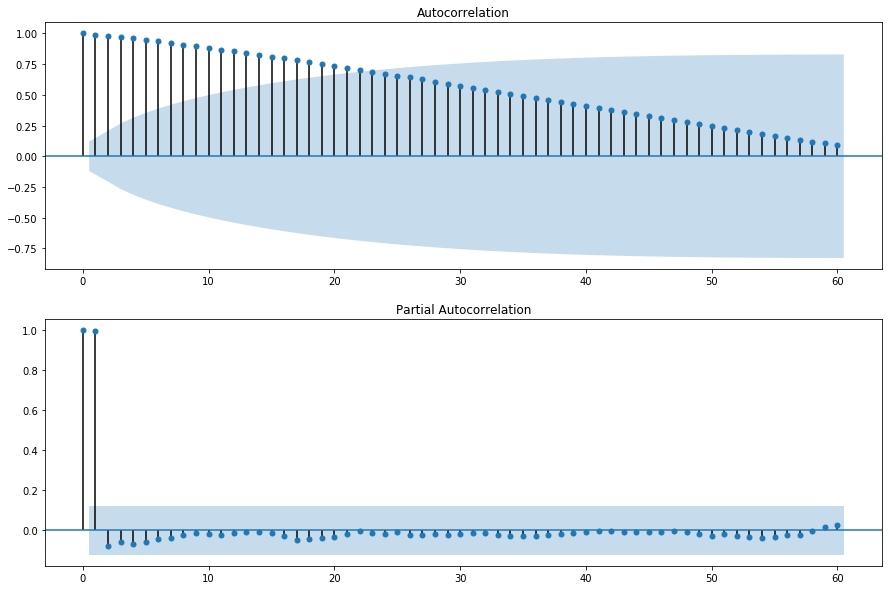

In [33]:
# This suggests that at least two levels of differencing is required. The d parameter in our
# ARIMA model should at least be a value of 2. The next step is to select the lag values for
# the Autoregression (AR) and Moving Average (MA) parameters, p and q respectively. We can
# do this by reviewing Autocorrelation Function (ACF) and Partial Autocorrelation Function
# (PACF) plots. The example below creates ACF and PACF plots for the series. (TEXT OF THIS APPROACH TAKEN FROM INTRO TO TIMESERIES FORECASTING w/ PYTHON
# BROWNLEE)

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

series = zip_df['1001']
plt.figure(figsize=(15,10))
plt.subplot(211)
plot_acf(series, lags=60, ax=plt.gca())
plt.subplot(212)
plot_pacf(series, lags=60, ax=plt.gca())
plt.show()


In [34]:
# ACF shows significant lag for about 20-22 months
# PACF shows a significant lag for 2 months
# A good starting point for p and q values is 20, 2 >> this does not converge


from statsmodels.tsa.arima.model import ARIMA

# load data
series = zip_df['1001']
# prepare data
X = series.values
X = X.astype('float32')

# set trainset to include all but last 60 months (5 years)
train_size = int(len(X) - 60)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(7,2,1))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = RMSE(test, predictions)
print(rmse)

>Predicted=183768.513, Expected=184800.000
>Predicted=186189.249, Expected=187000.000
>Predicted=189212.764, Expected=188600.000
>Predicted=190096.867, Expected=189100.000
>Predicted=189479.643, Expected=188700.000
>Predicted=188271.599, Expected=188100.000
>Predicted=187561.946, Expected=187100.000
>Predicted=186156.530, Expected=185900.000
>Predicted=184750.228, Expected=185100.000
>Predicted=184396.494, Expected=184800.000
>Predicted=184550.653, Expected=184900.000
>Predicted=185010.334, Expected=184500.000
>Predicted=184028.019, Expected=184500.000
>Predicted=184505.170, Expected=185100.000
>Predicted=185735.701, Expected=185800.000
>Predicted=186446.998, Expected=186400.000
>Predicted=186968.813, Expected=186900.000
>Predicted=187379.042, Expected=187400.000
>Predicted=187881.308, Expected=187900.000
>Predicted=188398.861, Expected=188800.000
>Predicted=189734.123, Expected=189800.000
>Predicted=190796.787, Expected=190800.000
>Predicted=191774.959, Expected=191500.000
>Predicted=

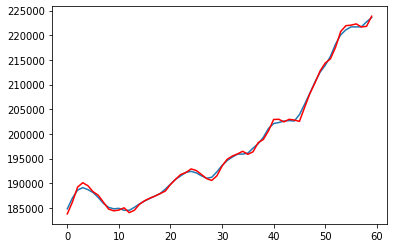

In [35]:
plt.plot(test)
plt.plot(predictions, color='red')

plt.show()

In [36]:
zip_df['22101']

time
1996-04-01     381700.0
1996-05-01     379800.0
1996-06-01     377800.0
1996-07-01     375600.0
1996-08-01     373500.0
                ...    
2017-12-01    1050500.0
2018-01-01    1057900.0
2018-02-01    1069800.0
2018-03-01    1091700.0
2018-04-01    1108400.0
Name: 22101, Length: 265, dtype: float64

In [37]:
zip_df['46240']

time
1996-04-01    142100.0
1996-05-01    141300.0
1996-06-01    140400.0
1996-07-01    139600.0
1996-08-01    138700.0
                ...   
2017-12-01    223700.0
2018-01-01    226300.0
2018-02-01    228400.0
2018-03-01    230800.0
2018-04-01    233000.0
Name: 46240, Length: 265, dtype: float64

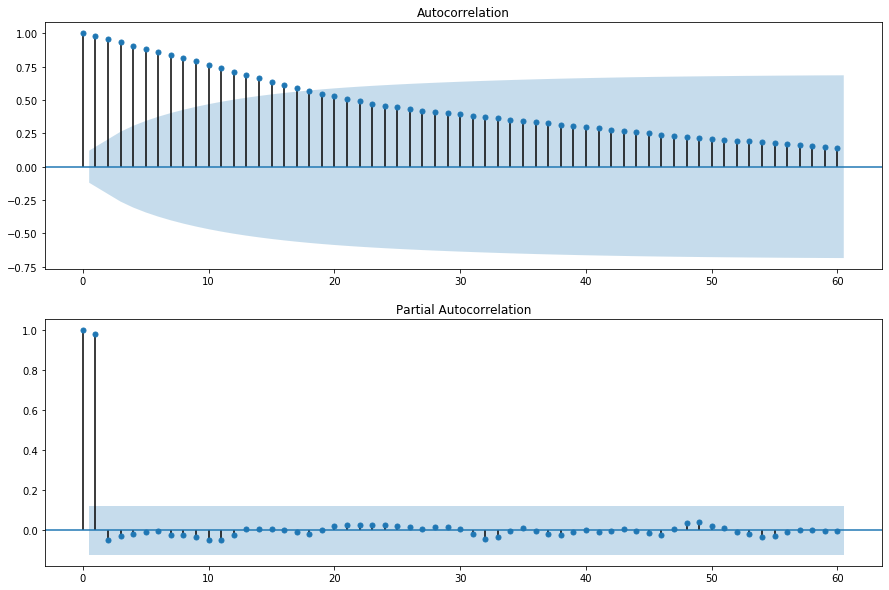

In [38]:
series = zip_df['46240']
plt.figure(figsize=(15,10))
plt.subplot(211)
plot_acf(series, lags=60, ax=plt.gca())
plt.subplot(212)
plot_pacf(series, lags=60, ax=plt.gca())
plt.show()

In [39]:

series = zip_df['46240']
# prepare data
X = series.values
X = X.astype('float32')

# set trainset to include all but last 60 months (5 years)
train_size = int(len(X) - 60)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(6,2,1))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = RMSE(test, predictions)
print(rmse)


>Predicted=179965.775, Expected=180200.000
>Predicted=180472.827, Expected=180400.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=180586.310, Expected=181000.000
>Predicted=181564.283, Expected=182200.000
>Predicted=183386.046, Expected=183700.000
>Predicted=185162.554, Expected=184400.000
>Predicted=184953.762, Expected=184100.000
>Predicted=183661.954, Expected=183400.000
>Predicted=182655.871, Expected=183400.000
>Predicted=183506.985, Expected=183900.000
>Predicted=184476.697, Expected=185500.000
>Predicted=187241.852, Expected=187500.000
>Predicted=189530.676, Expected=190200.000
>Predicted=192906.672, Expected=192600.000
>Predicted=194859.967, Expected=193400.000
>Predicted=193967.476, Expected=192800.000
>Predicted=192009.590, Expected=192500.000
>Predicted=192274.190, Expected=192700.000
>Predicted=193041.981, Expected=192900.000
>Predicted=193202.682, Expected=192300.000
>Predicted=191659.993, Expected=191400.000
>Predicted=190535.533, Expected=191100.000
>Predicted=190878.522, Expected=190800.000
>Predicted=190505.777, Expected=190100.000
>Predicted=189368.181, Expected=190000.000
>Predicted=

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=193970.861, Expected=192600.000
>Predicted=191755.507, Expected=191500.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=190372.630, Expected=191900.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=192436.393, Expected=193900.000
>Predicted=196005.098, Expected=196600.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=199293.835, Expected=198800.000
>Predicted=200842.506, Expected=200100.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=201268.566, Expected=201800.000
>Predicted=203499.162, Expected=204100.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=206480.816, Expected=207100.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=210134.141, Expected=210100.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=213037.084, Expected=213100.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=216001.218, Expected=215900.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=218648.203, Expected=218000.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=220019.553, Expected=218600.000
>Predicted=219083.573, Expected=217900.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=217169.003, Expected=217600.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=217440.743, Expected=218400.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=219391.045, Expected=219600.000
>Predicted=220856.784, Expected=220700.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=221774.117, Expected=221800.000
>Predicted=222892.956, Expected=221400.000
>Predicted=220898.451, Expected=219700.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=217965.226, Expected=218700.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=217848.763, Expected=218900.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=219278.465, Expected=219800.000
>Predicted=220744.075, Expected=221200.000
>Predicted=222555.548, Expected=223700.000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=226176.962, Expected=226300.000
>Predicted=228795.102, Expected=228400.000
>Predicted=230355.614, Expected=230800.000
>Predicted=233176.340, Expected=233000.000
[234.22478308610152, 173.44302128448297, 277.6713655477864, 398.5723462103945, 383.14659544223963, 468.24060566885765, 540.4238809866127, 513.9340332015935, 544.3398802731879, 531.1510411131028, 593.017127041921, 572.6403085389317, 580.6493791899851, 565.4988731186338, 663.7544314517478, 705.8482999933752, 695.0264775164496, 682.8601899975039, 665.4449718661076, 679.2775025134326, 665.3303785206726, 661.0796367474177, 646.7559193615806, 638.5334539568687, 638.266227657047, 651.442949062004, 650.2354702092463, 656.0170080328476, 693.0515112562247, 682.9976841707008, 725.7350722361144, 759.719896391887, 755.2540632448552, 748.8689624976467, 748.6879250081174, 743.5107779984219, 740.0165168914351, 737.0905332942144, 727.599827736688, 718.516132519578, 709.8756745346552, 708.4696764243974, 732.8847335050709, 746.15690832

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


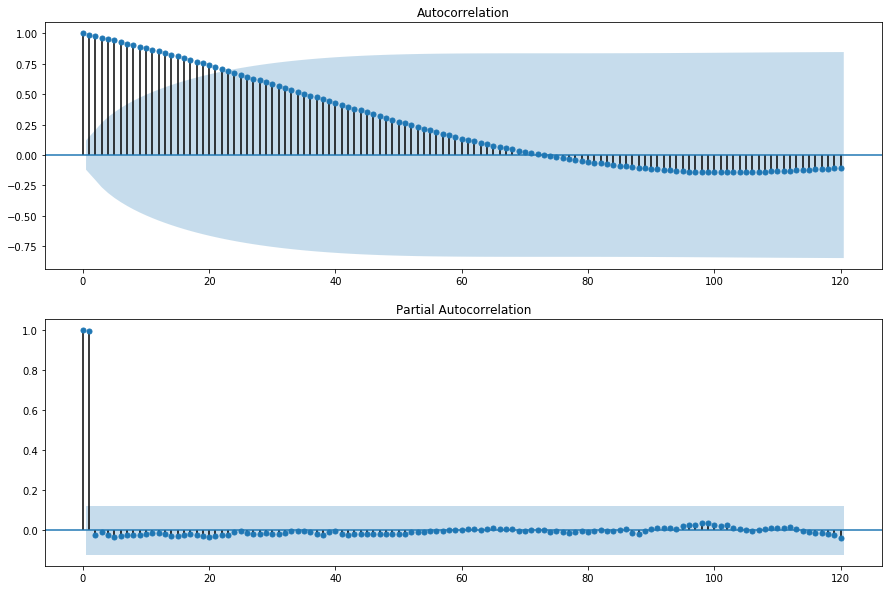

In [40]:
series = zip_df['22101']
plt.figure(figsize=(15,10))
plt.subplot(211)
plot_acf(series, lags=120, ax=plt.gca())
plt.subplot(212)
plot_pacf(series, lags=120, ax=plt.gca())
plt.show()

In [41]:
%%time

series = zip_df['22101']
# prepare data
X = series.values
X = X.astype('float32')


# set trainset to include all but last 60 months (5 years)
train_size = int(len(X) - 60)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(9,2,2))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = RMSE(test, predictions)
print(rmse)


>Predicted=897882.457, Expected=898900.000
>Predicted=906378.716, Expected=904600.000
>Predicted=910276.187, Expected=909400.000
>Predicted=914190.467, Expected=913700.000
>Predicted=917988.439, Expected=916700.000
>Predicted=919691.137, Expected=919000.000
>Predicted=921305.488, Expected=920400.000
>Predicted=921802.689, Expected=921600.000
>Predicted=922812.495, Expected=923500.000
>Predicted=925432.291, Expected=925300.000
>Predicted=927127.596, Expected=923300.000
>Predicted=921298.101, Expected=919800.000
>Predicted=916301.440, Expected=916100.000
>Predicted=912408.148, Expected=913600.000
>Predicted=911123.187, Expected=912000.000
>Predicted=910434.687, Expected=910900.000
>Predicted=909831.404, Expected=909600.000
>Predicted=908323.639, Expected=909800.000
>Predicted=910026.290, Expected=909400.000
>Predicted=908998.856, Expected=906400.000
>Predicted=903369.915, Expected=907200.000
>Predicted=908003.093, Expected=914700.000
>Predicted=922231.276, Expected=920600.000
>Predicted=

In [42]:
1 - (2799 / (test[-1] - test[0]))

0.9866396181384248

In [43]:
zip_df['46240'][-60:]

time
2013-05-01    180200.0
2013-06-01    180400.0
2013-07-01    181000.0
2013-08-01    182200.0
2013-09-01    183700.0
2013-10-01    184400.0
2013-11-01    184100.0
2013-12-01    183400.0
2014-01-01    183400.0
2014-02-01    183900.0
2014-03-01    185500.0
2014-04-01    187500.0
2014-05-01    190200.0
2014-06-01    192600.0
2014-07-01    193400.0
2014-08-01    192800.0
2014-09-01    192500.0
2014-10-01    192700.0
2014-11-01    192900.0
2014-12-01    192300.0
2015-01-01    191400.0
2015-02-01    191100.0
2015-03-01    190800.0
2015-04-01    190100.0
2015-05-01    190000.0
2015-06-01    190900.0
2015-07-01    192500.0
2015-08-01    193300.0
2015-09-01    192600.0
2015-10-01    191500.0
2015-11-01    191900.0
2015-12-01    193900.0
2016-01-01    196600.0
2016-02-01    198800.0
2016-03-01    200100.0
2016-04-01    201800.0
2016-05-01    204100.0
2016-06-01    207100.0
2016-07-01    210100.0
2016-08-01    213100.0
2016-09-01    215900.0
2016-10-01    218000.0
2016-11-01    218600.0
2016-1

In [45]:
zip_df

1001      1002      1005      1007      1008      1010  \
time                                                                     
1996-04-01  113100.0  161000.0  103100.0  133400.0  117500.0  115800.0   
1996-05-01  112800.0  160100.0  103400.0  132700.0  117300.0  115700.0   
1996-06-01  112600.0  159300.0  103600.0  132000.0  117100.0  115500.0   
1996-07-01  112300.0  158600.0  103800.0  131400.0  117000.0  115300.0   
1996-08-01  112100.0  158000.0  103900.0  130800.0  116800.0  115100.0   
...              ...       ...       ...       ...       ...       ...   
2017-12-01  221700.0  342000.0  213300.0  268100.0  205400.0  243800.0   
2018-01-01  221700.0  344500.0  215600.0  268100.0  204500.0  244600.0   
2018-02-01  221700.0  347400.0  217900.0  268800.0  206800.0  246700.0   
2018-03-01  222700.0  350600.0  219500.0  270000.0  210900.0  248800.0   
2018-04-01  223600.0  353300.0  220700.0  270600.0  214200.0  250900.0   

                1011      1013      1020      1026  ...     99654     99664  \
time                                                ...                       
1996-04-01   87000.0   88500.0   97200.0   91200.0  ...  122700.0  112200.0   
1996-05-01   87000.0   88500.0   97100.0   91100.0  ...  124200.0  112400.0   
1996-06-01   87100.0   88400.0   97000.0   91000.0  ...  125700.0  112600.0   
1996-07-01   87200.0   88300.0   96800.0   90800.0  ...  127200.0  112800.0   
1996-08-01   87400.0   88200.0   96600.0   90700.0  ...  128600.0  113000.0   
...              ...       ...       ...       ...  ...       ...       ...   
2017-12-01  151400.0  173300.0  187400.0  201200.0  ...  258800.0  219100.0   
2018-01-01  150100.0  174600.0  188100.0  204600.0  ...  259400.0  218900.0   
2018-02-01  150100.0  175900.0  189000.0  211200.0  ...  259900.0  218300.0   
2018-03-01  149500.0  176900.0  189600.0  217900.0  ...  260200.0  218400.0   
2018-04-01  149100.0  177400.0  189800.0  220800.0  ...  260500.0  219100.0   

               99669     99701     99705     99709     99712     99801  \
time                                                                     
1996-04-01  112500.0   89400.0  101900.0  103000.0  109200.0  166800.0   
1996-05-01  113100.0   89800.0  102900.0  103900.0  109600.0  166200.0   
1996-06-01  113800.0   90200.0  103800.0  104700.0  110000.0  165400.0   
1996-07-01  114400.0   90600.0  104700.0  105500.0  110400.0  164400.0   
1996-08-01  115100.0   91000.0  105400.0  106200.0  110800.0  163500.0   
...              ...       ...       ...       ...       ...       ...   
2017-12-01  250200.0  206700.0  261100.0  262800.0  273500.0  402300.0   
2018-01-01  250600.0  206100.0  261300.0  262800.0  273800.0  406200.0   
2018-02-01  250100.0  205600.0  261400.0  262300.0  273800.0  409800.0   
2018-03-01  249300.0  205500.0  261700.0  262000.0  273900.0  412600.0   
2018-04-01  249300.0  205700.0  262000.0  262400.0  274600.0  413300.0   

               99835     99901  
time                            
1996-04-01  155500.0  117100.0  
1996-05-01  154900.0  117200.0  
1996-06-01  154200.0  117300.0  
1996-07-01  153500.0  117400.0  
1996-08-01  152800.0  117500.0  
...              ...       ...  
2017-12-01  396200.0  291900.0  
2018-01-01  397500.0  294200.0  
2018-02-01  398900.0  297500.0  
2018-03-01  402100.0  302100.0  
2018-04-01  404800.0  305100.0  

[265 rows x 14723 columns]

In [47]:
def five_year_roi(series):
    """Return five year roi for zipcode dataframe, returning zero if na denominator values
    
    Params: series
    Returns: (float) ROI for preceding five years"""
    import numpy as np
    
    start_val = series[-60]
    end_val = series[-1]
    
    # Return zero if na value five years ago
    if np.isnan(start_val):
        return 0
    # Otherwise return ROI for those five years
    else:
        total_return = end_val - start_val
        roi = total_return / start_val
        return roi
    
five_year_roi(zip_df['1001'])    

0.20995670995670995

In [52]:
def five_year_std(series):
    
    """Return five year standard deviation for zipcode dataframe, returning zero if na denominator values
    
    Params: series
    Returns: (float) std for preceding five years"""
    
    import numpy as np
    
    start_val = series[-60]
    
    
    # Return zero if na value five years ago
    if np.isnan(start_val):
        return 0
    
    else:
        return series[-60:].std()
    
five_year_std(zip_df['1001'])
    

12190.62562411563

In [57]:
five_year_stds = {column: five_year_std(zip_df[column]) for column in zip_df.columns}
five_year_stds = {zipcode: roi for zipcode, roi in sorted(five_year_stds.items(), key=lambda item: item[1], reverse=True)}
five_year_stds

{'10021': 2580354.1543218414,
 '10011': 1362894.9010260978,
 '10128': 879125.1082543811,
 '94027': 783668.7487884683,
 '90210': 714569.0543957246,
 '10014': 636871.2597534921,
 '94301': 554140.4233988285,
 '33480': 537329.6518366894,
 '11217': 483551.9287808536,
 '94022': 475467.34185971296,
 '11975': 456133.44073843904,
 '94970': 447994.1275688312,
 '94123': 419916.0030715586,
 '94306': 408885.0272283462,
 '94957': 407182.817513867,
 '11238': 407045.93314771046,
 '94024': 401833.3365202333,
 '33139': 397683.45707493724,
 '94115': 390790.3135744485,
 '98039': 387893.1160516077,
 '94040': 367044.1312618761,
 '90402': 362521.4941260585,
 '11231': 359404.27200363565,
 '90049': 351698.13361239305,
 '94305': 350783.363764283,
 '94303': 349741.5108268965,
 '11976': 347540.3584254112,
 '11930': 346767.7401235523,
 '94028': 344145.63979078055,
 '33149': 326044.9126630353,
 '90020': 325972.6906649114,
 '94117': 324187.626721331,
 '95070': 320319.1271490264,
 '94010': 319481.04317651235,
 '34102

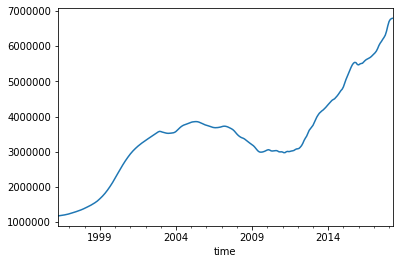

In [59]:
zip_df['94027'].plot()

In [60]:
five_year_rois = {column: five_year_roi(zip_df[column]) for column in zip_df.columns}

In [61]:
five_year_rois = {zipcode: roi for zipcode, roi in sorted(five_year_rois.items(), key=lambda item: item[1], reverse=True)}

In [62]:
# Sample test of ARIMA model took about 20 seconds to run, if we allow 20 minutes for modeling, then we want 60 zipcodes to test
test_zips = list(five_year_rois.keys())[0: 62]
test_zips

['80216',
 '94601',
 '48240',
 '94590',
 '33705',
 '37210',
 '15201',
 '33460',
 '33030',
 '37207',
 '11216',
 '33461',
 '33415',
 '32807',
 '34234',
 '34207',
 '34982',
 '33055',
 '33801',
 '30316',
 '33135',
 '33830',
 '32180',
 '33435',
 '33033',
 '48237',
 '33056',
 '80204',
 '32839',
 '94805',
 '33614',
 '85035',
 '11963',
 '94606',
 '94804',
 '33713',
 '33161',
 '32905',
 '30034',
 '34205',
 '33404',
 '33125',
 '33032',
 '32204',
 '48198',
 '33563',
 '80010',
 '93505',
 '33162',
 '32744',
 '94589',
 '33406',
 '48239',
 '33068',
 '32205',
 '80219',
 '30238',
 '33982',
 '33805',
 '49507',
 '89104',
 '33409']

In [63]:
zipcodes = zip_df[test_zips]
zipcodes.dropna(axis=1, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [64]:
zipcodes

94601    48240     94590     33705     37210     15201  \
time                                                                    
1996-04-01  114600.0  67800.0  108200.0   54600.0   60800.0   34400.0   
1996-05-01  114500.0  68200.0  107800.0   54800.0   61000.0   34600.0   
1996-06-01  114500.0  68500.0  107500.0   55000.0   61200.0   34700.0   
1996-07-01  114400.0  68800.0  107300.0   55200.0   61300.0   34700.0   
1996-08-01  114400.0  69200.0  107100.0   55400.0   61500.0   34800.0   
...              ...      ...       ...       ...       ...       ...   
2017-12-01  535800.0  71000.0  357100.0  167100.0  217200.0  170400.0   
2018-01-01  546900.0  72300.0  362500.0  168200.0  219300.0  171400.0   
2018-02-01  555000.0  73500.0  366900.0  171100.0  221500.0  173900.0   
2018-03-01  562000.0  75300.0  371600.0  175100.0  224300.0  179700.0   
2018-04-01  566700.0  76800.0  376100.0  177300.0  226500.0  185200.0   

               33460     33030     37207      11216  ...    48239     33068  \
time                                                 ...                      
1996-04-01   59800.0   76700.0   63600.0   146100.0  ...  80100.0   82000.0   
1996-05-01   59900.0   76600.0   63600.0   146600.0  ...  80700.0   81900.0   
1996-06-01   60000.0   76500.0   63600.0   147200.0  ...  81300.0   81800.0   
1996-07-01   60200.0   76400.0   63700.0   147700.0  ...  81900.0   81700.0   
1996-08-01   60400.0   76300.0   64000.0   148400.0  ...  82500.0   81600.0   
...              ...       ...       ...        ...  ...      ...       ...   
2017-12-01  206000.0  209200.0  189500.0  1545700.0  ...  90800.0  209200.0   
2018-01-01  209600.0  211100.0  191400.0  1540200.0  ...  91900.0  211000.0   
2018-02-01  211600.0  212700.0  193900.0  1553600.0  ...  93600.0  213700.0   
2018-03-01  213300.0  214300.0  197600.0  1578400.0  ...  95900.0  217300.0   
2018-04-01  215600.0  215600.0  200800.0  1598700.0  ...  97600.0  220100.0   

               32205     80219     30238     33982     33805     49507  \
time                                                                     
1996-04-01   54700.0   83700.0   85300.0   64100.0   41900.0   49700.0   
1996-05-01   54600.0   84000.0   85300.0   63700.0   41900.0   51000.0   
1996-06-01   54400.0   84300.0   85300.0   63300.0   42000.0   52300.0   
1996-07-01   54300.0   84700.0   85300.0   62900.0   42100.0   53500.0   
1996-08-01   54200.0   85100.0   85200.0   62500.0   42200.0   54600.0   
...              ...       ...       ...       ...       ...       ...   
2017-12-01  141100.0  298100.0   95400.0  187800.0   97000.0  106600.0   
2018-01-01  144100.0  302600.0   97200.0  192500.0   99000.0  107800.0   
2018-02-01  146100.0  306900.0   99100.0  196400.0  100400.0  108900.0   
2018-03-01  147200.0  311900.0  101100.0  199000.0  101600.0  110200.0   
2018-04-01  147700.0  315700.0  102900.0  200200.0  102500.0  111200.0   

               89104     33409  
time                            
1996-04-01   94800.0   77300.0  
1996-05-01   94700.0   77200.0  
1996-06-01   94700.0   77200.0  
1996-07-01   94700.0   77100.0  
1996-08-01   94800.0   77100.0  
...              ...       ...  
2017-12-01  196300.0  190000.0  
2018-01-01  199500.0  192500.0  
2018-02-01  202500.0  193700.0  
2018-03-01  206000.0  195800.0  
2018-04-01  208500.0  198600.0  

[265 rows x 60 columns]

In [65]:
test_stationarity(zipcodes['94601'])
test_stationarity(zipcodes['94601'].diff()[1:])
test_stationarity(zipcodes['94601'].diff()[1:].diff()[1:])

ADF Statistic: -2.047906
p-value: 0.265971
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
ADF Statistic: -2.062114
p-value: 0.260019
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
ADF Statistic: -4.522312
p-value: 0.000179
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


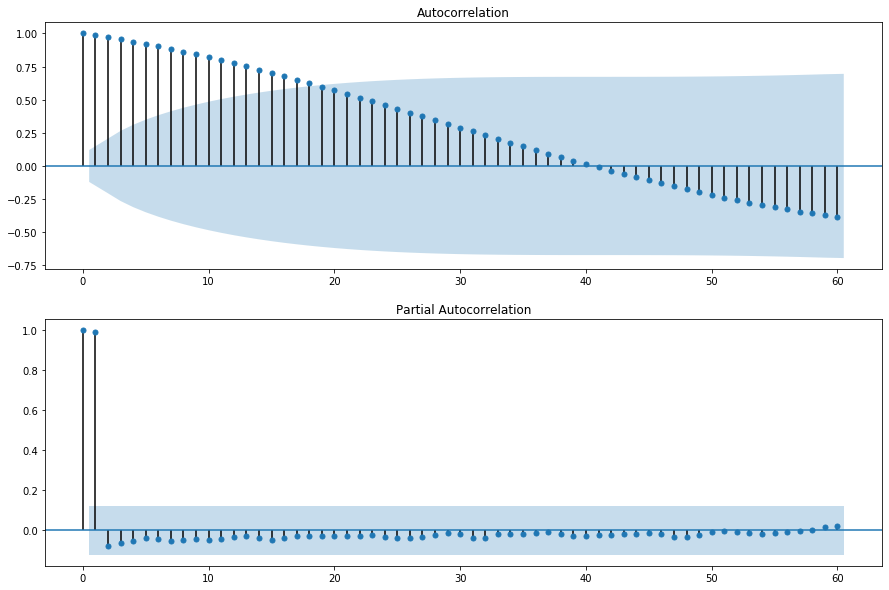

In [66]:
series = zipcodes['94601']
plt.figure(figsize=(15,10))
plt.subplot(211)
plot_acf(series, lags=60, ax=plt.gca())
plt.subplot(212)
plot_pacf(series, lags=60, ax=plt.gca())
plt.show()

In [70]:
# zipcodes['94590'].rolling(60).min().plot()
# zipcodes['94590'].rolling(60).max().plot()
zipcodes['94590'].std()

101092.86595868957

In [71]:
series = zipcodes['94601']
print(series[-108], series.tail(108))

238500.0 time
2009-05-01    238500.0
2009-06-01    227300.0
2009-07-01    218600.0
2009-08-01    212600.0
2009-09-01    208800.0
                ...   
2017-12-01    535800.0
2018-01-01    546900.0
2018-02-01    555000.0
2018-03-01    562000.0
2018-04-01    566700.0
Name: 94601, Length: 108, dtype: float64


In [72]:
%%time

series = zipcodes['94601']
# prepare data
X = series.values
X = X.astype('float32')


# set trainset to include all but last 48 months (4 years) only training on data between 9-4 years ago
train_size = int(len(X) - 48)
train, test = X[-108:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(13,2,2))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = RMSE(test, predictions)

print(rmse)

>Predicted=296793.961, Expected=294200.000
>Predicted=296544.999, Expected=293900.000
>Predicted=293930.669, Expected=294100.000
>Predicted=294617.011, Expected=297300.000
>Predicted=300625.961, Expected=302200.000
>Predicted=307113.059, Expected=307700.000
>Predicted=313084.206, Expected=313600.000
>Predicted=319236.965, Expected=318800.000
>Predicted=323741.200, Expected=323100.000
>Predicted=327320.068, Expected=327300.000
>Predicted=331622.745, Expected=332200.000
>Predicted=337272.279, Expected=339500.000
>Predicted=346806.349, Expected=349500.000
>Predicted=359265.328, Expected=358800.000
>Predicted=367748.761, Expected=366700.000
>Predicted=374328.105, Expected=375100.000
>Predicted=383343.638, Expected=382900.000
>Predicted=390669.035, Expected=386200.000
>Predicted=389778.725, Expected=389800.000
>Predicted=393717.577, Expected=397600.000
>Predicted=405407.517, Expected=406500.000
>Predicted=415229.421, Expected=413300.000
>Predicted=419990.120, Expected=418100.000
>Predicted=

In [73]:
model_fit

In [219]:
zipcodes.to_pickle('../data/processed/zipcodes.pkl')

In [75]:
test_stationarity(series)
test_stationarity(series.diff()[1:])
test_stationarity(series.diff()[1:].diff()[1:])

ADF Statistic: -2.047906
p-value: 0.265971
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
ADF Statistic: -2.062114
p-value: 0.260019
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
ADF Statistic: -4.522312
p-value: 0.000179
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


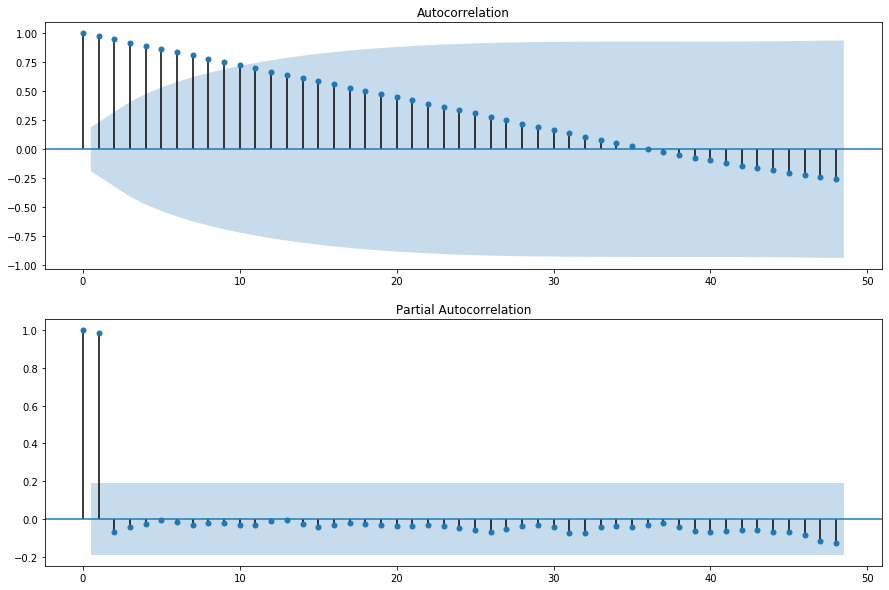

In [76]:
series = zipcodes['94601'][-108:]
plt.figure(figsize=(15,10))
plt.subplot(211)
plot_acf(series, lags=48, ax=plt.gca())
plt.subplot(212)
plot_pacf(series, lags=48, ax=plt.gca())
plt.show()

[2592.8983282349654, 5716.586280829841, 8451.235740079414, 10048.925596908002, 10874.123967578575, 11263.003588388648, 11365.606880361307, 11393.070968269409, 11474.13779980959, 11604.921885195225, 11702.786762349915, 11582.00210500987, 11212.993918952045, 10805.935391280436, 10460.77035787036, 10245.037981599953, 10183.415532958896, 10058.214797907935, 9899.49097033272, 9874.24946551357, 10074.106793680203, 10378.517666230393, 10647.612600326403, 10781.670500765873, 10836.711548751568, 10882.18187243388, 10969.809073044658, 11075.528113492026, 11172.224712880046, 11277.23728503663, 11431.888729706294, 11643.709650463357, 11915.476807052404, 12133.887800957189, 12249.6287899642, 12350.24687814418, 12549.97422634828, 12844.850726802473, 13138.423471321796, 13430.817260938675, 13813.985477576824, 14263.322305503654, 14712.582144114624, 15319.177993318977, 16182.300527287422, 17133.425848213254, 18106.393345403983, 18986.37555992623] [294200. 293900. 294100. 297300. 302200. 307700. 313600

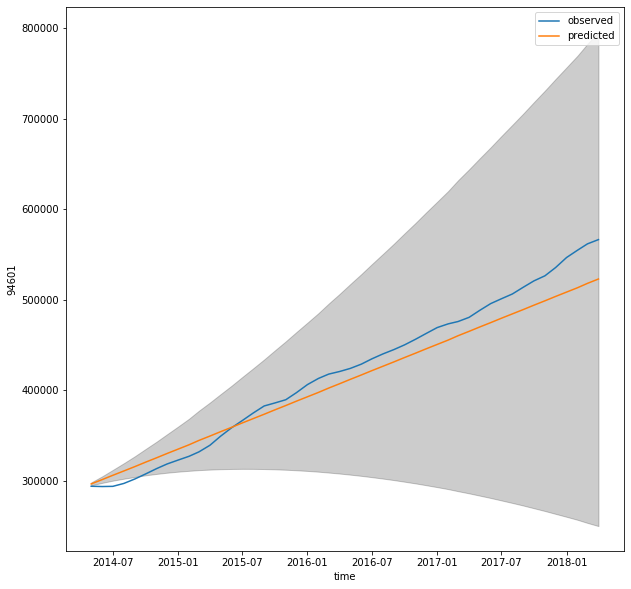

In [93]:
%%time

# First go at using SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX
import seaborn as sns

series = zipcodes['94601']
# # prepare data
# X = series.values
# X = X.astype('float32')

# X = X[-108:]

# set trainset to include all but last 48 months (4 years) only training on data between 9-4 years ago
train_size = int(len(X) - 48)
train, test = X[-108:train_size], X[train_size:]


model = SARIMAX(train, order=(7,2,2))

results = model.fit()

# Predict 48 months from end of train set
forecast = results.get_forecast(steps=48, dynamic=True)
pred_ci = forecast.conf_int(alpha=.2)

fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(series[-48:].index, series[-48:], label='observed', ax=ax)


# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.2)


predictions = forecast.predicted_mean

sns.lineplot(x=series[-48:].index, y=predictions, ax=ax, label='predicted')
# plt.plot()
plt.fill_between(series[-48:].index, pred_ci[:,0], pred_ci[:,1], color='k', alpha=0.2)

print(RMSE(test, predictions), test, predictions)

# results.save('../models/bad_first_model.pkl')

In [88]:
pred_ci[:,1]

array([299308.48133214, 307083.30216361, 315392.1852092 , 324163.65284614,
       333348.96106527, 342891.38379923, 352718.41760791, 362856.15755156,
       373300.45374956, 384034.83968603, 395045.93621561, 406322.52676258,
       417853.52927112, 429628.34482479, 441638.9762032 , 453878.32747166,
       466339.65165925, 479016.72916547, 491903.85170193, 504995.70804477,
       518287.34000132, 531774.15195531, 545451.86167888, 559316.45325104,
       573364.15184415, 587591.40240176, 601994.84810849, 616571.31232549,
       631317.78404241, 646231.40417402, 661309.45296006, 676549.33898546,
       691948.58945335, 707504.84140118, 723215.83380001, 739079.40045863,
       755093.46359311, 771256.02797696, 787565.17561973, 804019.06091562,
       820615.90620674, 837353.99771723, 854231.68182038, 871247.36160383,
       888399.4937028 , 905686.58537509, 923107.1917949 , 940659.9135447 ])

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


12704.02532003033

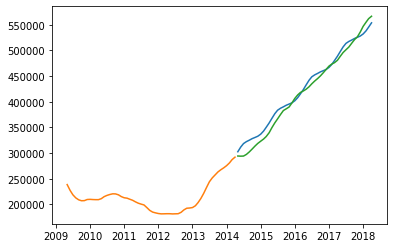

In [140]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Holt Winters
series = zipcodes['94601']
# # prepare data
# X = series.values
# X = X.astype('float32')

X = series[-108:]

# set trainset to include all but last 48 months (4 years) only training on data between 9-4 years ago
train_size = int(len(X) - 48)
train, test = X[-108:train_size], X[train_size:]


model = ExponentialSmoothing(train, trend='add', seasonal='add', freq='MS')

results = model.fit()

# Predict 48 months from end of train set
forecast = results.predict(start=test.index[0], end=test.index[-1])
plt.plot(forecast)
plt.plot(train)
plt.plot(test)
RMSE(test, forecast)

In [145]:
def error_as_pct(rmse, start_val, end_val):
    total_delta = end_val - start_val
    error_pct = rmse / total_delta
    return error_pct

def hw_rmse(series):
    """Simple wrapper that fits holtwinters model and returns RMSE for the predictions"""
    
    from statsmodels.tsa.holtwinters import ExponentialSmoothing

    X = series[-108:]

    # set trainset to include all but last 48 months (4 years) only training on data between 9-4 years ago
    train_size = int(len(X) - 48)
    train, test = X[-108:train_size], X[train_size:]


    model = ExponentialSmoothing(train, trend='add', seasonal='add', freq='MS')

    results = model.fit()

    # Predict 48 months from end of train set
    forecast = results.predict(start=test.index[0], end=test.index[-1])
    
    rmse = RMSE(test, forecast)
    rmse_pct = error_as_pct(rmse, train[-1], test[-1])
    return (rmse, rmse_pct)



In [146]:
rmses = {column: hw_rmse(zipcodes[column]) for column in zipcodes.columns}
rmses

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Che

{'94601': (12704.02532003033, 0.04624690688034339),
 '48240': (3401.16519079381, 0.09717614830839456),
 '94590': (34380.18745561215, 0.18553797871350322),
 '33705': (33277.50390903215, 0.3668964047302332),
 '37210': (49981.198193653865, 0.39667617614011),
 '15201': (64995.467454522164, 0.6131647873068129),
 '33460': (13347.230933733312, 0.13111228815062193),
 '33030': (23077.5372789465, 0.21669049088212677),
 '37207': (40318.6287732253, 0.37786906066752857),
 '11216': (72699.99814741786, 0.09447693066591016),
 '33461': (44224.531108455616, 0.44048337757425915),
 '33415': (30233.362149124503, 0.31460314411159734),
 '32807': (30386.596764248858, 0.3191869408009334),
 '34234': (22860.146033355937, 0.3072600273300529),
 '34207': (22146.369515307193, 0.25455597144031256),
 '34982': (38709.60051907971, 0.4820622729648781),
 '33055': (23162.380511406198, 0.1836826368866471),
 '33801': (26088.867472150505, 0.4160903903054307),
 '30316': (39987.57938029795, 0.334064990645764),
 '33135': (52813.

In [150]:
errors, pcts = zip(*list(rmses.values()))

In [151]:
erros

NameError: name 'erros' is not defined

In [152]:
errors


(12704.02532003033,
 3401.16519079381,
 34380.18745561215,
 33277.50390903215,
 49981.198193653865,
 64995.467454522164,
 13347.230933733312,
 23077.5372789465,
 40318.6287732253,
 72699.99814741786,
 44224.531108455616,
 30233.362149124503,
 30386.596764248858,
 22860.146033355937,
 22146.369515307193,
 38709.60051907971,
 23162.380511406198,
 26088.867472150505,
 39987.57938029795,
 52813.469759628315,
 7396.3975641197485,
 16423.345607291547,
 29467.1137071914,
 23261.681290515244,
 18511.672045380525,
 44785.177332724576,
 72093.17139370968,
 27935.731156419737,
 142666.69946684697,
 18136.515917886947,
 881799.0342776306,
 44241.53275791737,
 17124.11285530892,
 28095.954351520948,
 67411.18698591384,
 23355.12954735429,
 8544.636751442678,
 26665.377339792034,
 20798.863025682957,
 44376.490012456044,
 30619.18056400883,
 21639.313528330804,
 22185.310834016836,
 39926.34552289758,
 32166.13378280803,
 11514.895969577852,
 61227.82320171327,
 24477.822516685254,
 21199.2110473654

In [154]:
pcts = pd.Series(pcts)

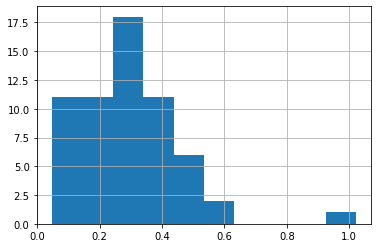

In [155]:
pcts.hist()

In [196]:
def SARIMAX_error(series, p=10, d=2, q=2):
    """Simple wrapper that fits holtwinters model and returns RMSE for the predictions"""
    
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    
    X = series
    
    # set trainset to include all but last 48 months (4 years) only training on data between 9-4 years ago
    train_size = int(len(X) - 48)
    train, test = X[-108:train_size], X[train_size:]

    model = SARIMAX(train, order=(p,d,q), freq='MS',  initialization='approximate_diffuse')

    results = model.fit()

    # Predict 48 months from end of train set
    forecast = results.get_forecast(steps=48)
    pred_ci = forecast.conf_int(alpha=.05)

    predictions = forecast.predicted_mean

    rmse = RMSE(test, predictions)
    pct = error_as_pct(rmse, train[-1], test[-1])
    
    return pred_ci, rmse, pct, (train[-1], test[-1])

SARIMAX_error(zipcodes['94601'])

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(             lower 94601   upper 94601
 2014-05-01  2.866430e+05  3.045451e+05
 2014-06-01  2.744237e+05  3.248173e+05
 2014-07-01  2.639015e+05  3.428284e+05
 2014-08-01  2.540481e+05  3.613625e+05
 2014-09-01  2.437071e+05  3.820881e+05
 2014-10-01  2.324828e+05  4.031474e+05
 2014-11-01  2.181850e+05  4.261999e+05
 2014-12-01  1.998174e+05  4.517525e+05
 2015-01-01  1.780939e+05  4.808580e+05
 2015-02-01  1.553211e+05  5.123503e+05
 2015-03-01  1.329109e+05  5.435850e+05
 2015-04-01  1.097886e+05  5.760839e+05
 2015-05-01  8.489285e+04  6.101623e+05
 2015-06-01  5.778595e+04  6.451621e+05
 2015-07-01  2.824950e+04  6.823643e+05
 2015-08-01 -2.876635e+03  7.214324e+05
 2015-09-01 -3.457734e+04  7.617704e+05
 2015-10-01 -6.663797e+04  8.029851e+05
 2015-11-01 -9.961066e+04  8.447041e+05
 2015-12-01 -1.342064e+05  8.878033e+05
 2016-01-01 -1.705466e+05  9.322360e+05
 2016-02-01 -2.082856e+05  9.777794e+05
 2016-03-01 -2.469646e+05  1.024840e+06
 2016-04-01 -2.861956e+05  1.072819e+06


In [159]:
pcts = [SARIMAX_error(zipcodes[column]) for column in zipcodes.columns]

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/

In [160]:
pcts

[(              lower 94601    upper 94601
  2014-05-01  294372.918717  299239.434644
  2014-06-01  296262.982934  306952.456000
  2014-07-01  297619.716632  315200.195596
  2014-08-01  298596.489203  323914.851238
  2014-09-01  299285.329231  333046.620670
  2014-10-01  299706.879377  342527.231757
  2014-11-01  299815.516315  352272.660664
  2014-12-01  299608.352464  362304.547669
  2015-01-01  299112.954328  372626.136069
  2015-02-01  298355.587742  383219.208647
  2015-03-01  297351.868762  394062.234027
  2015-04-01  296115.830716  405145.815907
  2015-05-01  294655.067823  416457.222806
  2015-06-01  292975.308411  427987.822116
  2015-07-01  291081.588260  439730.504290
  2015-08-01  288980.156036  451680.644100
  2015-09-01  286676.780940  463832.796411
  2015-10-01  284176.781154  476181.816076
  2015-11-01  281484.945486  488722.821398
  2015-12-01  278605.706515  501451.352495
  2016-01-01  275543.130061  514363.171585
  2016-02-01  272301.071252  527454.375236
  2016-03-0

In [166]:
error_pcts = [pcts[i][2] for i, _ in enumerate(pcts)]

In [171]:
error_pcts.sort()

In [172]:
error_pcts

[0.03476662009595162,
 0.04011035916167918,
 0.0497103358410879,
 0.05597280522036252,
 0.05609288645612878,
 0.05648118613956228,
 0.058085551715603014,
 0.0605715259373735,
 0.06799346494279633,
 0.06854336563754279,
 0.0752200972807887,
 0.07572486554138572,
 0.09380236013454252,
 0.11479482344497993,
 0.11664730822924867,
 0.12054128055388119,
 0.12522525809721138,
 0.14069517444956045,
 0.14456171200137483,
 0.1682898435199696,
 0.1752317004116414,
 0.17713779185209813,
 0.18943603211567422,
 0.20130660551717455,
 0.22377808447632974,
 0.24088905237487296,
 0.24374320080155826,
 0.25409882779092047,
 0.2559060226525212,
 0.28191408667203344,
 0.28375371942509875,
 0.28591280070848296,
 0.28751470371894094,
 0.29618662704771537,
 0.2961973197891863,
 0.30025946781595,
 0.31291169092306426,
 0.32429200238499484,
 0.35575163725387654,
 0.369777062311754,
 0.3700086122875114,
 0.3908066575640126,
 0.40543624985179005,
 0.40863944960491133,
 0.4448873363091298,
 0.4505916873748211,
 0.

In [180]:
opt_col = zipcodes['94601'].rolling(108).aggregate(lambda x: SARIMAX_error(x)[2])

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/

In [185]:
opt_col.std()

6.447116316225688

In [190]:
opt_col2 = zipcodes['48239'].rolling(108).aggregate(lambda x: SARIMAX_error(x)[2])

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueW

In [191]:
opt_col2.std()

7.133445806388977

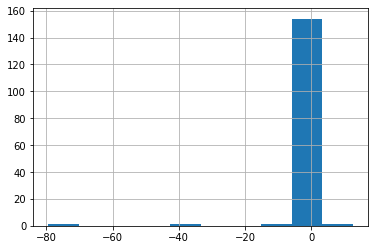

In [192]:
opt_col2.hist()

In [193]:
zipcodes

94601    48240     94590     33705     37210     15201  \
time                                                                    
1996-04-01  114600.0  67800.0  108200.0   54600.0   60800.0   34400.0   
1996-05-01  114500.0  68200.0  107800.0   54800.0   61000.0   34600.0   
1996-06-01  114500.0  68500.0  107500.0   55000.0   61200.0   34700.0   
1996-07-01  114400.0  68800.0  107300.0   55200.0   61300.0   34700.0   
1996-08-01  114400.0  69200.0  107100.0   55400.0   61500.0   34800.0   
...              ...      ...       ...       ...       ...       ...   
2017-12-01  535800.0  71000.0  357100.0  167100.0  217200.0  170400.0   
2018-01-01  546900.0  72300.0  362500.0  168200.0  219300.0  171400.0   
2018-02-01  555000.0  73500.0  366900.0  171100.0  221500.0  173900.0   
2018-03-01  562000.0  75300.0  371600.0  175100.0  224300.0  179700.0   
2018-04-01  566700.0  76800.0  376100.0  177300.0  226500.0  185200.0   

               33460     33030     37207      11216  ...    48239     33068  \
time                                                 ...                      
1996-04-01   59800.0   76700.0   63600.0   146100.0  ...  80100.0   82000.0   
1996-05-01   59900.0   76600.0   63600.0   146600.0  ...  80700.0   81900.0   
1996-06-01   60000.0   76500.0   63600.0   147200.0  ...  81300.0   81800.0   
1996-07-01   60200.0   76400.0   63700.0   147700.0  ...  81900.0   81700.0   
1996-08-01   60400.0   76300.0   64000.0   148400.0  ...  82500.0   81600.0   
...              ...       ...       ...        ...  ...      ...       ...   
2017-12-01  206000.0  209200.0  189500.0  1545700.0  ...  90800.0  209200.0   
2018-01-01  209600.0  211100.0  191400.0  1540200.0  ...  91900.0  211000.0   
2018-02-01  211600.0  212700.0  193900.0  1553600.0  ...  93600.0  213700.0   
2018-03-01  213300.0  214300.0  197600.0  1578400.0  ...  95900.0  217300.0   
2018-04-01  215600.0  215600.0  200800.0  1598700.0  ...  97600.0  220100.0   

               32205     80219     30238     33982     33805     49507  \
time                                                                     
1996-04-01   54700.0   83700.0   85300.0   64100.0   41900.0   49700.0   
1996-05-01   54600.0   84000.0   85300.0   63700.0   41900.0   51000.0   
1996-06-01   54400.0   84300.0   85300.0   63300.0   42000.0   52300.0   
1996-07-01   54300.0   84700.0   85300.0   62900.0   42100.0   53500.0   
1996-08-01   54200.0   85100.0   85200.0   62500.0   42200.0   54600.0   
...              ...       ...       ...       ...       ...       ...   
2017-12-01  141100.0  298100.0   95400.0  187800.0   97000.0  106600.0   
2018-01-01  144100.0  302600.0   97200.0  192500.0   99000.0  107800.0   
2018-02-01  146100.0  306900.0   99100.0  196400.0  100400.0  108900.0   
2018-03-01  147200.0  311900.0  101100.0  199000.0  101600.0  110200.0   
2018-04-01  147700.0  315700.0  102900.0  200200.0  102500.0  111200.0   

               89104     33409  
time                            
1996-04-01   94800.0   77300.0  
1996-05-01   94700.0   77200.0  
1996-06-01   94700.0   77200.0  
1996-07-01   94700.0   77100.0  
1996-08-01   94800.0   77100.0  
...              ...       ...  
2017-12-01  196300.0  190000.0  
2018-01-01  199500.0  192500.0  
2018-02-01  202500.0  193700.0  
2018-03-01  206000.0  195800.0  
2018-04-01  208500.0  198600.0  

[265 rows x 60 columns]

In [197]:
# %%time
opt_col3 = zipcodes['11216'].rolling(108).aggregate(lambda x: SARIMAX_error(x)[2])

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueW

In [198]:
opt_col3.std()

40.50313322215573

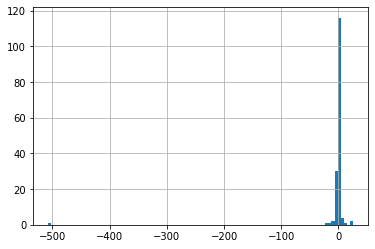

In [201]:
opt_col3.hist(bins=100)

In [206]:
opt_col3.tail(50)

time
2014-03-01    0.164402
2014-04-01    1.883731
2014-05-01    0.645087
2014-06-01    0.662739
2014-07-01    0.155609
2014-08-01    0.545853
2014-09-01    0.298025
2014-10-01    0.540353
2014-11-01    0.161639
2014-12-01    0.114079
2015-01-01    0.187917
2015-02-01    0.072208
2015-03-01    0.226065
2015-04-01    0.568403
2015-05-01    0.123505
2015-06-01    0.180238
2015-07-01    0.211096
2015-08-01    0.351055
2015-09-01    0.357184
2015-10-01    0.543535
2015-11-01    0.618243
2015-12-01    0.352198
2016-01-01    0.446886
2016-02-01    0.216388
2016-03-01    0.365563
2016-04-01    0.077979
2016-05-01    0.181138
2016-06-01    0.138805
2016-07-01    0.579882
2016-08-01    0.060159
2016-09-01    0.365419
2016-10-01    0.292605
2016-11-01    0.306801
2016-12-01    0.350510
2017-01-01    0.652333
2017-02-01    0.494224
2017-03-01    0.378324
2017-04-01    0.131585
2017-05-01    0.246836
2017-06-01    0.269787
2017-07-01    0.169025
2017-08-01    0.078360
2017-09-01    0.156612
2017-1

In [207]:
len(opt_col3)

265

In [208]:
dicDataFrame= {column: zipcodes[column].rolling(108).aggregate(lambda x: SARIMAX_error(x)[2]) for column in zipcodes.columns}

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueW

In [210]:
errors_df = pd.DataFrame(dict_errors)

In [211]:
errors_df

94601     48240     94590     33705     37210     15201  \
time                                                                     
1996-04-01       NaN       NaN       NaN       NaN       NaN       NaN   
1996-05-01       NaN       NaN       NaN       NaN       NaN       NaN   
1996-06-01       NaN       NaN       NaN       NaN       NaN       NaN   
1996-07-01       NaN       NaN       NaN       NaN       NaN       NaN   
1996-08-01       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2017-12-01  0.557372  0.268516  0.030723  0.141683  0.192585  0.321179   
2018-01-01  0.030639  0.080963  0.053505  0.312947  0.279975  0.452367   
2018-02-01  0.142304  0.367338  0.126595  0.113641  0.409999  0.498664   
2018-03-01  0.035259  0.193956  0.060614  0.149773  0.401275  0.526141   
2018-04-01  0.125651  0.632167  0.238555  0.116830  0.506187  0.592479   

               33460     33030     37207     11216  ...     48239     33068  \
time                                                ...                       
1996-04-01       NaN       NaN       NaN       NaN  ...       NaN       NaN   
1996-05-01       NaN       NaN       NaN       NaN  ...       NaN       NaN   
1996-06-01       NaN       NaN       NaN       NaN  ...       NaN       NaN   
1996-07-01       NaN       NaN       NaN       NaN  ...       NaN       NaN   
1996-08-01       NaN       NaN       NaN       NaN  ...       NaN       NaN   
...              ...       ...       ...       ...  ...       ...       ...   
2017-12-01  0.165638  0.146247  0.860533  0.536752  ...  0.322795  0.083129   
2018-01-01  0.045370  0.042966  0.286543  0.302284  ...  0.348747  0.074482   
2018-02-01  0.341642  0.705278  0.337116  0.115289  ...  0.302995  0.083253   
2018-03-01  0.149404  0.086801  0.384804  0.132074  ...  0.188709  0.113376   
2018-04-01  0.126808  0.144173  0.546731  0.053889  ...  0.243560  0.121934   

               32205     80219     30238     33982     33805     49507  \
time                                                                     
1996-04-01       NaN       NaN       NaN       NaN       NaN       NaN   
1996-05-01       NaN       NaN       NaN       NaN       NaN       NaN   
1996-06-01       NaN       NaN       NaN       NaN       NaN       NaN   
1996-07-01       NaN       NaN       NaN       NaN       NaN       NaN   
1996-08-01       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2017-12-01  0.362242  0.388269  0.546484  0.550694  0.584457  0.441412   
2018-01-01  0.437613  0.407071  0.256024  0.293913  0.212655  0.188860   
2018-02-01  0.236339  0.402065  0.397682  0.457009  0.506844  0.117428   
2018-03-01  0.476494  0.350856  0.348844  0.398452  0.521269  0.348772   
2018-04-01  0.320014  0.331593  0.196953  0.386666  0.582857  0.243260   

               89104     33409  
time                            
1996-04-01       NaN       NaN  
1996-05-01       NaN       NaN  
1996-06-01       NaN       NaN  
1996-07-01       NaN       NaN  
1996-08-01       NaN       NaN  
...              ...       ...  
2017-12-01  0.715321  0.125243  
2018-01-01  0.191578  0.204450  
2018-02-01  0.118441  0.350733  
2018-03-01  0.124663  0.154882  
2018-04-01  0.057634  0.139359  

[265 rows x 60 columns]

In [212]:
errors_df.dropna()

94601     48240     94590     33705     37210     15201  \
time                                                                     
2005-03-01  0.198816  1.160469  0.050062  0.204700  0.556428  0.153183   
2005-04-01  0.185480  1.292595  0.048766  0.214983  0.542404  0.293860   
2005-05-01  0.198448  1.199488  0.048701  0.220525  0.407560  0.201076   
2005-06-01  0.171409  1.433556  0.051104  0.233000  0.447464  0.119558   
2005-07-01  0.160038  1.160690  0.062843  0.260013  0.363420  0.164845   
...              ...       ...       ...       ...       ...       ...   
2017-12-01  0.557372  0.268516  0.030723  0.141683  0.192585  0.321179   
2018-01-01  0.030639  0.080963  0.053505  0.312947  0.279975  0.452367   
2018-02-01  0.142304  0.367338  0.126595  0.113641  0.409999  0.498664   
2018-03-01  0.035259  0.193956  0.060614  0.149773  0.401275  0.526141   
2018-04-01  0.125651  0.632167  0.238555  0.116830  0.506187  0.592479   

               33460     33030     37207     11216  ...     48239     33068  \
time                                                ...                       
2005-03-01  0.287780  0.244003  0.977744  0.211050  ...  1.234784  0.674110   
2005-04-01  0.288321  0.259267  0.998884  0.220657  ...  1.789909  0.659905   
2005-05-01  0.305051  0.286829  0.651325  0.250153  ...  1.321828  0.626524   
2005-06-01  0.298325  0.312967  0.246528  0.265583  ...  1.336989  0.512978   
2005-07-01  0.301967  0.313014  0.385373  0.294438  ...  1.209495  0.515437   
...              ...       ...       ...       ...  ...       ...       ...   
2017-12-01  0.165638  0.146247  0.860533  0.536752  ...  0.322795  0.083129   
2018-01-01  0.045370  0.042966  0.286543  0.302284  ...  0.348747  0.074482   
2018-02-01  0.341642  0.705278  0.337116  0.115289  ...  0.302995  0.083253   
2018-03-01  0.149404  0.086801  0.384804  0.132074  ...  0.188709  0.113376   
2018-04-01  0.126808  0.144173  0.546731  0.053889  ...  0.243560  0.121934   

               32205     80219     30238     33982     33805     49507  \
time                                                                     
2005-03-01  0.189255  0.959610  0.448001  0.244193  0.307724  0.194984   
2005-04-01  0.205836  1.001248  0.460966  0.272226  0.295506  0.084532   
2005-05-01  0.231907  0.944602  0.598628  0.302943  0.337566  0.057431   
2005-06-01  0.250582  1.080831  0.595122  0.343414  0.306990  0.041882   
2005-07-01  0.285672  0.990552  0.594586  0.378390  0.307597  0.024487   
...              ...       ...       ...       ...       ...       ...   
2017-12-01  0.362242  0.388269  0.546484  0.550694  0.584457  0.441412   
2018-01-01  0.437613  0.407071  0.256024  0.293913  0.212655  0.188860   
2018-02-01  0.236339  0.402065  0.397682  0.457009  0.506844  0.117428   
2018-03-01  0.476494  0.350856  0.348844  0.398452  0.521269  0.348772   
2018-04-01  0.320014  0.331593  0.196953  0.386666  0.582857  0.243260   

               89104     33409  
time                            
2005-03-01  0.253500  0.298641  
2005-04-01  0.258988  0.307420  
2005-05-01  0.273154  0.301942  
2005-06-01  0.283620  0.311968  
2005-07-01  0.307264  0.297271  
...              ...       ...  
2017-12-01  0.715321  0.125243  
2018-01-01  0.191578  0.204450  
2018-02-01  0.118441  0.350733  
2018-03-01  0.124663  0.154882  
2018-04-01  0.057634  0.139359  

[158 rows x 60 columns]

In [213]:
errors_df = errors_df.dropna()

In [215]:
errors_df.to_pickle('../data/processed/errors_df.pkl')